# **Regresión Lineal Simple**

### **Base de datos:** FelicidadyGDP.csv

*Antes de 
continuar, pregúntate:¿¿qué dirección crees que tendrá la asociació ((a mayor GDP, mayor  
menor felicid)?*)?

<p>Creo que los datos tendrán una asociación positiva, es decir, creo que entre mayor sea el GDP mayor será la felicidad.</p>

1. Importa los datos del archivo “Felicidad y GDP.csv” a tu ambiente de trabajo. Por curiosidad, revisemos cuáles son los países más felices, así como los que tienen mayor GDP. Imprime en consola un resumen de 10 filas de la base de datos, previamente ordenada de mayor a menor felicidad. Repite el proceso, pero ahora ordenando la 
base de datos de mayor a menor GDP.

In [103]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statsmodels.api as sm

In [17]:
#Leer CSV
df = pd.read_csv('FelicidadyGDP.csv')
print('Primeros 10 países más felices')
print(df.head(10).sort_values('Felicidad', ascending=False))
print('\nPrimeros 10 países con mejor  GDP')
print(df.head(10).sort_values('GDP', ascending=False))

Primeros 10 países más felices
          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11
5   Luxembourg     7.4040  7.335313e+10
6       Sweden     7.3843  5.414870e+11
7       Norway     7.3651  3.621980e+11
8       Israel     7.3638  4.071010e+11
9  New Zealand     7.1998  2.117350e+11

Primeros 10 países con mejor  GDP
          Pais  Felicidad           GDP
4  Netherlands     7.4149  9.138650e+11
3  Switzerland     7.5116  7.522480e+11
6       Sweden     7.3843  5.414870e+11
8       Israel     7.3638  4.071010e+11
7       Norway     7.3651  3.621980e+11
1      Denmark     7.6362  3.560850e+11
0      Finland     7.8210  2.718370e+11
9  New Zealand     7.1998  2.117350e+11
5   Luxembourg     7.4040  7.335313e+10
2      Iceland     7.5575  2.171808e+10


Gracias a estas tablas se puede observar que, aunque el #1 de las listas es distito, y aunque el orden en el que etsán los países es diferente, los países dentro del top 10 (sin tomar en cuenta el orden) son los mismos. Esto nos dice que debe haber una relación entre la variable 'Felicidad' y 'GDP'.

2. Grafica las observaciones, definiendo el valor de “y” como el nivel de felicidad y el valor 
de “x” como el logaritmo base 10 del GDP

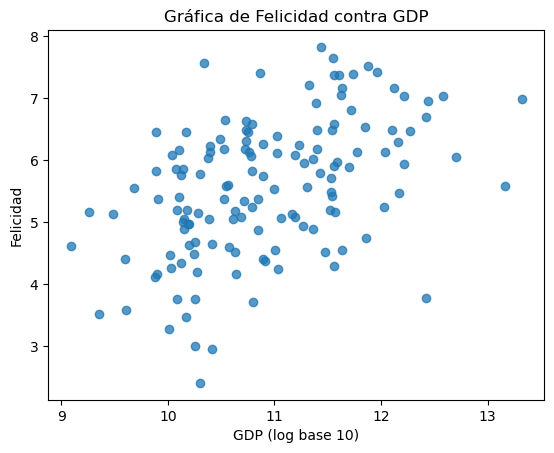

In [20]:
#Agregar una columna nueva dentro de la BD con el GDP convertido a logaritmo base 10
df['GDPlog'] = np.log10(df['GDP'])
#Utilizar esa nueva columna para gráficar la Felicidad ('y') contra el GDP ('x')
plt.scatter(df['GDPlog'], df['Felicidad'], alpha=0.75)
plt.ylabel('Felicidad')
plt.xlabel('GDP (log base 10)')
plt.title('Gráfica de Felicidad contra GDP')
plt.show()

3. Calcula los valores óptimos de los dos coeficientes del modelo de regresión lineal simple.

In [22]:
#Calcular promedio de 'x'
x = df['GDPlog']
promx = x.mean()
#Calcular promedio de 'y'
y = df['Felicidad']
promy = y.mean()
#Calcular numerador y denominador de B1
B1num = sum((x-promx)*(y-promy))
B1den = sum((x-promx)**2)
#Calcular el valor de B1
B1 = B1num/B1den
#Con el resultado calcular B0
B0 = promy - (B1*promx)
#Imprimir resultados
print('Los valores óptimos de B0 y B1 para el modelo de regresión lineal simple son:')
print('B0 = ', B0)
print('B1 = ', B1)

Los valores óptimos de B0 y B1 para el modelo de regresión lineal simple son:
B0 =  -1.3023500570747277
B1 =  0.6281284658810408


4. Realiza una nueva gráfica en la que se muestren tanto las observaciones, como la línea 
que representa el modelo de regresión lineal simpl.e

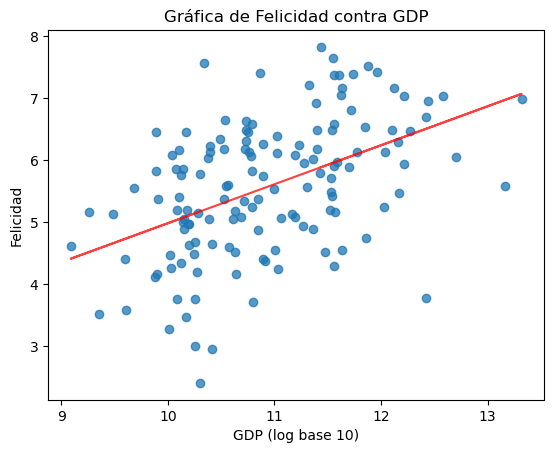

In [24]:
plt.scatter(x, y, alpha=0.75)
yPred = B0 + B1*x
plt.plot(x, yPred, color='red', alpha=0.75)
plt.ylabel('Felicidad')
plt.xlabel('GDP (log base 10)')
plt.title('Gráfica de Felicidad contra GDP')
plt.show()

Se puede observar que la línea parece tener sentido, pues los puntos parecen tener una tendencia positiva así como es indicado y mostrado con la línea representada por la ecuación 'y = mx + b', donde 'm' es 'B1', 'b' es 'B0' y 'x' representa todos los datos dentro de la variable GDP.

5. Calcula el RSS del modelo e imprímelo en la consola.

In [27]:
RSS = sum((y - yPred)**2)
print('El error de este modelo (RSS) es: ')
print('RSS = ', RSS)

El error de este modelo (RSS) es: 
RSS =  131.3738317732635


6. Calcula el error estándar e intervalo de confianza de B11, e imprime dichos valores en l 
consol Asimismo, determina si
la asociación entre la felicidad y el GDP es significativa en esta población, imprimiend 
en consola un mensaje que claramente explique el por qué de la afirmación, evidencia o
por alguna métrica calculada.a.

In [93]:
#Calcular error estándar
ES = np.sqrt(RSS / ((len(x)-2)*sum((x-promx)**2)))
print('SE = ', ES)
#Calcular intervalos de confianza con ES
intervalos = st.t.interval(confidence=0.95, df=len(x)-2, loc=np.mean(x), scale=st.sem(x))
print('Intervalos de confianza: ', intervalos[0], ' - ', intervalos[1])
#Calcular p value
t = B1/ES
p = st.t.sf(abs(t), len(x)-2)*2
print('p value = ', p)
print('Gracias a estos datos podemos entender que existe una asociación significativa para esta población entre la felicidad y el GDP ya que la variable p values calculada tiene un valor de ', p, ', lo cuál nos indica que existe una probabilidad muy pequeña de que GDP no esté relacionado a felicidad. Además de esto, hay una probabilidad del ', ES*100, '% de que la meadia de la muestra sea diferente de la media de la población. Esto nos demuestra que los valores que la línea de nuestro modelo predicen un valor relativamente cercano a los reales variando entre los intervalos ', intervalos[0], ' - ', intervalos[1], 'con un 95% de probabilidad.')

SE =  0.09983378435340727
Intervalos de confianza:  10.788042702977364  -  11.062119095806299
p value =  3.825717831968765e-09
Gracias a estos datos podemos entender que existe una asociación significativa para esta población entre la felicidad y el GDP ya que la variable p values calculada tiene un valor de  3.825717831968765e-09 , lo cuál nos indica que existe una probabilidad muy pequeña de que GDP no esté relacionado a felicidad. Además de esto, hay una probabilidad del  9.983378435340727 % de que la meadia de la muestra sea diferente de la media de la población. Esto nos demuestra que los valores que la línea de nuestro modelo predicen un valor relativamente cercano a los reales variando entre los intervalos  10.788042702977364  -  11.062119095806299 con un 95% de probabilidad.


7. Calcula el residual standard error y la R^22 del modelo, e imprime dichos valores en l 
consol  Adicionalmente, agrega un comentario, imprimiéndolo en 
consola, sobre tu opinión del valor deR^2
2 obtenido con el model.a.

In [113]:
#Calcular RSE
RSE = np.sqrt(RSS/(len(x)-2))
print('RSE = ', RSE)
#Calcular R^2 con TSS
TSS = sum((y - promy)**2)
R2 = (TSS - RSS)/TSS
print('R^2 = ', R2)
print('Dado el valor anterior de R^2 se puede decir que el modelo encontrado explica un ', R2, ' de los datos originales. Es un valor relativamente bajo, pero eso se puede deber a que hay muchos puntos muy alejados de la línea, por lo que la predicción no es exacta.')

RSE =  0.9721807858537376
R^2 =  0.22166361654970654
Dado el valor anterior de R^2 se puede decir que el modelo encontrado explica un  0.22166361654970654  de los datos originales. Es un valor relativamente bajo, pero eso se puede deber a que hay muchos puntos muy alejados de la línea, por lo que la predicción no es exacta.


8. Finalmente, usa la función “OLS()” de la librería statsmodels.api para verificar que los 
resultados de todos los puntos anteriores son los esperados.

In [122]:
model = sm.OLS(y,sm.add_constant(x))
results = model.fit()
print(results.summary())
print('\nRSE obtenido del modelo = ', results.scale**.5)

                            OLS Regression Results                            
Dep. Variable:              Felicidad   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     39.59
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           3.83e-09
Time:                        17:44:15   Log-Likelihood:                -195.09
No. Observations:                 141   AIC:                             394.2
Df Residuals:                     139   BIC:                             400.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3024      1.094     -1.191      0.2

### *"Doy mi palabra de que he realizado esta actividad con integridad académica."*